**Numpy** <br>
Numpy is a python library which performs with arrays and matrices.It provides mathematical functionality to the language.

**Pandas** <br>
Pandas is a data manupulation and data analysis tool built on top of python language. It allows data from different formats like csv, json, excel to be stored in data structures, known as, series and dataframes. This allows easy access to the data for cleaning and analysis purpose.Pandas is built on top of numpy.



In [22]:
# Importing Pandas and numpy
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("Titanic-Dataset.csv")

In [24]:
data.shape

(891, 12)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*Analysing Missing Data*

In [26]:
# Data missing in each coloumn
missing_data = data.isnull().sum()
missing_data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
# Percentage of missing data
total_data_points = np.prod(data.shape) # Using numpy to find product.
total_missing_data = missing_data.sum()
percentage_missing_data = (total_missing_data / total_data_points) * 100
percentage_missing_data

8.099513655069211

*Removing Missing Data*

In [28]:
# Removing columns with missing values
clean_data = data.drop(columns=["Cabin","Age"])

In [29]:
clean_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


In [30]:
# Removing rows with missing values
clean_data = clean_data.dropna(axis=0)
clean_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [31]:
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


**Visualization**

**Matplotlib** <br>
Matplotlib is a python library that allows the visualization of data. It helps in plotting data points and creating interactive charts.

**Seaborn** <br>
Seaborn is built on top of matplotlib and uses it functionality. It helps in creating attractive graphics.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Creating gender and survived series for data visualisation
gender = clean_data["Sex"].value_counts()
survived = clean_data["Survived"].value_counts()

Text(0, 0.5, 'Count')

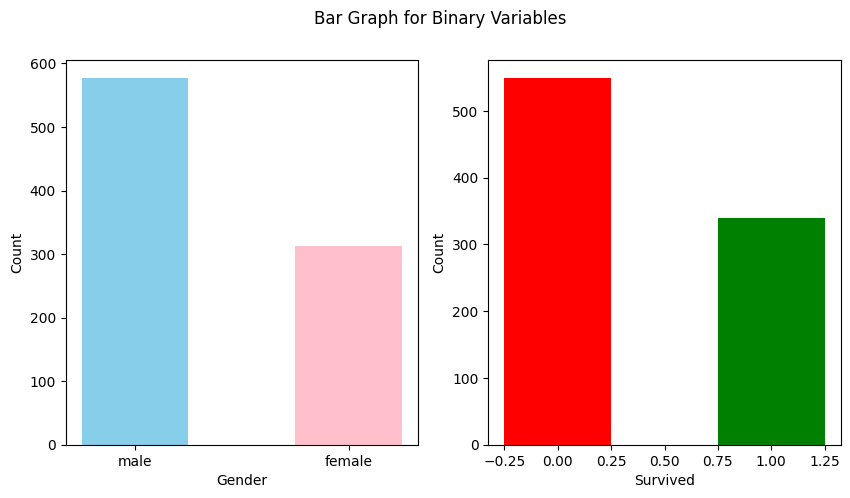

In [34]:
#using Matplotlib
#plotting bargraphs to visual how many people belong to each gender as well as how many people in the dataset survived.
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Bar Graph for Binary Variables")
ax[0].bar(gender.index,gender,width=0.5, color=['skyblue', 'pink'])
ax[0].set_xlabel("Gender")
ax[0].set_ylabel("Count")
ax[1].bar(survived.index, survived,width=0.5, color=['red', 'green'])
ax[1].set_xlabel("Survived")
ax[1].set_ylabel("Count")

Text(0.5, 1.0, 'Gender Distribution')

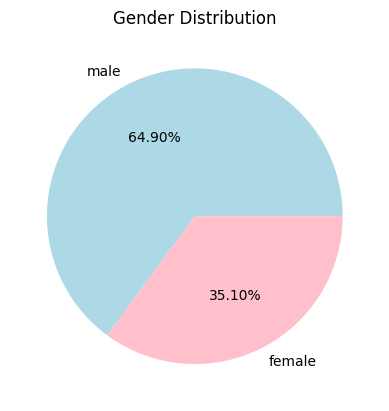

In [35]:
#Creating pie chart for Variable Gender.
plt.pie(gender, labels =gender.index, colors=['lightblue','pink'], autopct='%.2f%%')
plt.title("Gender Distribution")

In [36]:
#Visualization variable embarked
Embarked = clean_data["Embarked"].value_counts()
Embarked.index = ["Cherbourg","Queenstown","Southampton"]

<ipython-input-37-90ab7d546488>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Embarked.index,y=Embarked, palette=palette, legend='auto')
<ipython-input-37-90ab7d546488>:4: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=Embarked.index,y=Embarked, palette=palette, legend='auto')


Text(0.5, 0, 'Embarked')

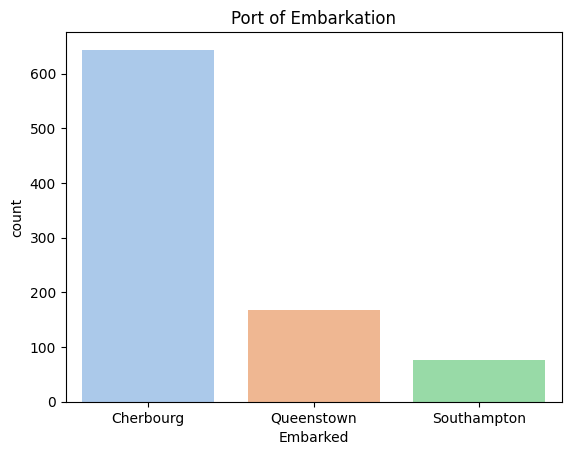

In [37]:
#Using Seaborn to add functionality to matplotlib
palette = sns.color_palette("pastel")
plt.title("Port of Embarkation")
sns.barplot(x=Embarked.index,y=Embarked, palette=palette, legend='auto')
plt.xlabel("Embarked")

In [38]:
#Visualising variable Pclass
ticket_class = clean_data["Pclass"].value_counts()

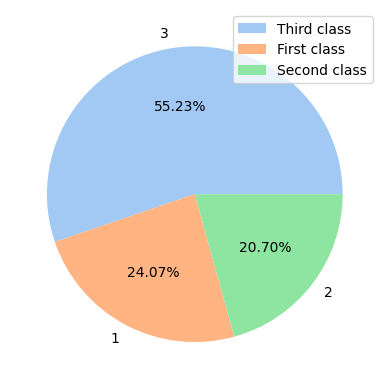

In [39]:
palette = sns.color_palette("pastel")
wedges, text, percent = plt.pie(ticket_class, labels=ticket_class.index, colors= palette, autopct='%.2f%%')
plt.legend(wedges,["Third class","First class", "Second class"], loc="upper right")